In [59]:
import glob
import os
from typing import List, Tuple, Optional, Dict
import pickle
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
from flwr.common import Metrics
from omegaconf import DictConfig
from flwr.server.history import History
from dataset import *
from torch.utils.data import Sampler, RandomSampler
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, Subset
from torchvision.transforms import ToTensor, Compose
from utils import plot_client_stats

In [78]:
datapath = 'D:/Datasets/data' #'D:/DesktopC/Datasets/data/' 
subset = True #True
num_classes = 30
num_workers = 1
batch_size=32
seed=2024
num_partitions = 16
alpha = 0.1
partitioning = 'dirichlet' 
balance=True
# partitioning = 'iid'
val_ratio = 0.3

In [79]:
def plot_exp_summary(trainsets: list[CustomSubset], title_str: str, num_classes: int, save_str: str):
    for c_id, sub_trainset in enumerate(trainsets):
        tmp = get_subset_stats(sub_trainset)
        classes = list(tmp.keys())
        counter = list(tmp.values())
        # dy = list(range(len(classes)))
        dy = list(tmp.keys())
        dx = [c_id] * len(classes)
        plt.scatter(dx, dy, s = counter)
    plt.xticks(range(len(trainsets)))
    plt.xlabel('Client')
    plt.yticks(range(num_classes))
    plt.ylabel('Class')
    plt.title(title_str)
    plt.savefig(f"{save_str}.png")
    plt.close()

In [81]:

trf = Compose([
         Resize_with_pad(),
         ToTensor(),
    ])
trainset, testset = get_food101(trf, datapath,subset, num_classes)
if partitioning == "iid":
    trainsets = partitioning_iid(trainset, num_partitions, balance, seed)
    title_str = f"Clients data partitioning: {partitioning.upper()}"
    if balance:
        save_str_cid: str ="balanced" # equal splits per client based on each label quantity
    else:
        save_str_cid: str ="U" #uniform shuffle rand generator
    save_str_exp = f"images/clients_vis/{partitioning}/clients_{len(trainsets)}/classes_{num_classes}/{save_str_cid}/summary" #clients_{len(trainsets)}_classes_{num_classes}_
elif partitioning == "dirichlet":
    trainsets = partitioning_dirichlet(alpha, trainset, num_partitions, seed)
    title_str = f"Clients data partitioning: {partitioning.upper()}, a={alpha}"
    save_str_cid: str = (f"a_{alpha}")
    save_str_exp = f"images/clients_vis/{partitioning}/clients_{len(trainsets)}/classes_{num_classes}/{save_str_cid}/summary" #alpha_{alpha}_clients_{len(trainsets)}_classes_{num_classes}_
else:
    raise ValueError


# Obtain and save data statistic plots
if not os.path.exists(f'./images/clients_vis/{partitioning}/clients_{len(trainsets)}/classes_{num_classes}/{save_str_cid}'):
        os.makedirs(f'./images/clients_vis/{partitioning}/clients_{len(trainsets)}/classes_{num_classes}/{save_str_cid}')
plot_exp_summary(trainsets, title_str, num_classes, save_str_exp)

# for c_id, sub_trainset in enumerate(trainsets):
#     tmp = get_subset_stats(sub_trainset)
#     plot_client_stats(partitioning, c_id+1, tmp, num_classes, save_str_cid, save_str_exp)

In [4]:
trf = Compose([
        # Resize_with_pad(),
        # ToTensor(),
])
trainset, testset = get_food101(trf, datapath, subset, num_classes)

In [5]:
print(type(trainset))
print(len(trainset.indices))
print(len(trainset.labels))
print(trainset.indices)
print(trainset.labels)
print(len(testset))

<class 'dataset.CustomSubset'>
7500
7500
[ 5250  5251  5252 ... 62997 62998 62999]
[4 4 4 ... 9 9 9]
2500


In [6]:
from utils import get_subset_stats
sample_counts = get_subset_stats(trainset)
label_to_index = trainset.dataset.class_to_idx
final_dict = {}
for key in sorted(sample_counts.keys()):
    # Map the key to the corresponding label using index_to_label dictionary
    label = list(label_to_index.keys())[list(label_to_index.values()).index(key)]
    final_dict[key] = label                                    
    # print(key)
    # print(label)

print(final_dict)

{0: 'apple_pie', 1: 'baby_back_ribs', 2: 'baklava', 3: 'beef_carpaccio', 4: 'beef_tartare', 5: 'beet_salad', 6: 'beignets', 7: 'bibimbap', 8: 'bread_pudding', 9: 'breakfast_burrito'}


In [48]:
# print(len(tmp))
# tags = trainset.dataset.class_to_idx.items()[:len(tmp)]
# print(tags)
print()
# trainset.dataset.__getitem__(0)

# len(trainset.dataset._labels)
# trainset.classes
# print(len(trainset.labels))

{'apple_pie': 0, 'baby_back_ribs': 1, 'baklava': 2, 'beef_carpaccio': 3, 'beef_tartare': 4, 'beet_salad': 5, 'beignets': 6, 'bibimbap': 7, 'bread_pudding': 8, 'breakfast_burrito': 9, 'bruschetta': 10, 'caesar_salad': 11, 'cannoli': 12, 'caprese_salad': 13, 'carrot_cake': 14, 'ceviche': 15, 'cheese_plate': 16, 'cheesecake': 17, 'chicken_curry': 18, 'chicken_quesadilla': 19, 'chicken_wings': 20, 'chocolate_cake': 21, 'chocolate_mousse': 22, 'churros': 23, 'clam_chowder': 24, 'club_sandwich': 25, 'crab_cakes': 26, 'creme_brulee': 27, 'croque_madame': 28, 'cup_cakes': 29, 'deviled_eggs': 30, 'donuts': 31, 'dumplings': 32, 'edamame': 33, 'eggs_benedict': 34, 'escargots': 35, 'falafel': 36, 'filet_mignon': 37, 'fish_and_chips': 38, 'foie_gras': 39, 'french_fries': 40, 'french_onion_soup': 41, 'french_toast': 42, 'fried_calamari': 43, 'fried_rice': 44, 'frozen_yogurt': 45, 'garlic_bread': 46, 'gnocchi': 47, 'greek_salad': 48, 'grilled_cheese_sandwich': 49, 'grilled_salmon': 50, 'guacamole': 5

In [7]:
print(len(trainset))

7500


In [69]:
for i in range(10):
    img_xy = np.random.randint(len(trainset))
    print(img_xy)
    print(trainset.indices[img_xy])
    print(trainset.__getitem__(img_xy))

6203
45203


IndexError: index 45203 is out of bounds for axis 0 with size 7500

In [81]:
def show_ds(trainset: CustomSubset, classes, validset=None, cols=6, rows=17, preds=None, is_pred=False, is_valid=False):        
    fig = plt.figure(figsize=(25,25))
    fig.suptitle(f"Showing one random image from each {'Validation' if is_valid else 'Train'} classes", y=0.92, fontsize=24) # Adding  y=1.05, fontsize=24 helped me fix the suptitle overlapping with axes issue
    columns = cols
    rows = rows

    for i in range(1, columns*rows +1):
        fig.add_subplot(rows, columns, i)
        
        img_xy = np.random.randint(len(trainset));
        img, label = 
        np_img = trainset[img_xy][0].numpy()
        img = np.transpose(np_img, (1,2,0))
        # img = img * imgenet_std + imgenet_mean

        plt.title(classes[trainset[img_xy][1]])
        plt.axis('off')
        img = np.clip(img, 0, 1)
        plt.imshow(img, interpolation='nearest')
    plt.show()

# def __getitem__(self, idx):
#         image = self.dataset[self.indices[idx]][0]
#         label = self.labels[self.indices[idx]]
#         return (image, label)

# show_ds(trainset.dataset, final_dict)

SyntaxError: invalid syntax (2781909773.py, line 11)

In [8]:
print(trainset.indices)
print(len(trainset))

[ 5250  5251  5252 ... 62997 62998 62999]
7500


In [113]:
# trainloader = DataLoader(Subset(trainset.dataset, trainset.indices), batch_size=1, 
#                                     shuffle=True, num_workers=num_workers)

# checked_family = []
# for i, img_object in enumerate(trainloader):
#     # img_object = trainset.__getitem__(idx)
#     # img_class = img_object[1] - 1
#     print(img_object)
#     if img_class not in checked_family:
#         checked_family.append(img_class)
#     else: 
#         continue
    
#     # Convert the PIL image object to a NumPy array
#     img_array = np.array(img_object[0])
#     print(img_array.shape) # HxWxC
#     # img_array = np.transpose(img_array, (1, 2, 0))
#     # Display the image using Matplotlib
#     plt.imshow(img_array)
#     plt.title(f'Image with label {final_dict[img_class]}')
#     plt.axis('off')  # Turn off axis labels
#     plt.show()
#     # if len(checked_family) == 3:
#     #     break
#     if i % 1000 == 0:
#         print(i)

# print(i)

In [9]:
print(len(trainset))
print(trainset)

7500


(<PIL.Image.Image image mode=RGB size=512x512 at 0x20C5955CD60>, 5)
(512, 512, 3)


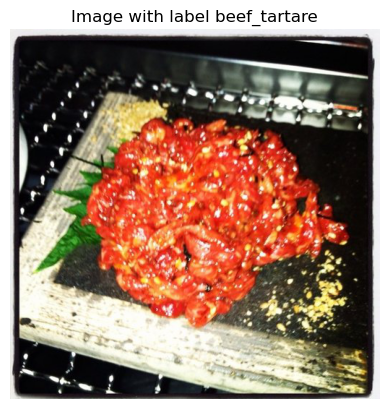

(<PIL.Image.Image image mode=RGB size=512x512 at 0x20C596019F0>, 5)
(<PIL.Image.Image image mode=RGB size=512x512 at 0x20C59602020>, 5)
(<PIL.Image.Image image mode=RGB size=512x512 at 0x20C59602080>, 5)
(<PIL.Image.Image image mode=RGB size=512x512 at 0x20C59602290>, 5)
(<PIL.Image.Image image mode=RGB size=512x512 at 0x20C59601F90>, 5)
(<PIL.Image.Image image mode=RGB size=384x512 at 0x20C59603010>, 5)
(<PIL.Image.Image image mode=RGB size=512x512 at 0x20C596019F0>, 5)
(<PIL.Image.Image image mode=RGB size=512x512 at 0x20C59602020>, 5)
(<PIL.Image.Image image mode=RGB size=512x382 at 0x20C59602080>, 5)
(<PIL.Image.Image image mode=RGB size=512x512 at 0x20C59602290>, 5)
(<PIL.Image.Image image mode=RGB size=512x289 at 0x20C59601F90>, 5)
(<PIL.Image.Image image mode=RGB size=512x512 at 0x20C59603010>, 5)
(<PIL.Image.Image image mode=RGB size=512x341 at 0x20C596019F0>, 5)
(<PIL.Image.Image image mode=RGB size=512x384 at 0x20C59602020>, 5)
(<PIL.Image.Image image mode=RGB size=384x512 at

In [129]:
# trf commented
# for i, (img, label) in enumerate(trainset):
#     img_np = np.array(img)
#     plt.imshow(img_np)
#     plt.title(f'Image with label {label} {trainset.dataset._labels}')
#     plt.axis('off')  # Turn off axis labels
#     plt.show()
#     break
# print(trainset.__getitem__(5))
checked_family = []
for i, img_object in enumerate(trainset):
    # img_object = trainset.__getitem__(idx)
    img_class = img_object[1] - 1
    print(img_object)
    if img_class not in checked_family:
        checked_family.append(img_class)  
    else: 
        continue
    
    # Convert the PIL image object to a NumPy array
    img_array = np.array(img_object[0])
    print(img_array.shape) # HxWxC
    # img_array = np.transpose(img_array, (1, 2, 0))
    # Display the image using Matplotlib
    plt.imshow(img_array)
    plt.title(f'Image with label {final_dict[img_class]}')
    plt.axis('off')  # Turn off axis labels
    plt.show()
    # if len(checked_family) == 3:
    #     break

print(i)

# 5 

In [47]:
# grayscale_img = np.mean(img_array, axis=2) # to channel dim

# # Flatten the grayscale image array
# pixel_values = grayscale_img.flatten()

# # Create a histogram of pixel values
# plt.hist(pixel_values, bins=50, color='gray', alpha=0.7)
# plt.title('Histogram of Pixel Values')
# plt.xlabel('Pixel Value')
# plt.ylabel('Frequency')
# plt.show()
# Create histograms for each channel
def hist_rgb(img_array: np.ndarray, save_str: str):
    rgb_dict = {0: "Red", 1: "Green", 2: "Blue"}
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    # Loop over each channel
    for i in range(3):
        # Flatten the channel array to create a 1D array containing all pixel values of the channel
        channel_values = img_array[:, :, i].flatten()
        # Create a histogram for the channel and plot it on the corresponding subplot
        axs[i].hist(channel_values, bins=50, color=['red', 'green', 'blue'][i], alpha=0.7)
        # Set titles and labels for each subplot
        axs[i].set_title(f"{rgb_dict[i]} channel histogram") #{i+1}
        axs[i].set_xlabel('Pixel Value')
        axs[i].set_ylabel('Frequency')

    # Set the overall title for the figure
    fig.suptitle('Histograms of pixels for each channel')
    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.savefig(f"images/preproc/hist_RGB_{save_str}", bbox_inches='tight')
    # Show the plot
    plt.show()

def object_printer(img_object, i, trf = False):
    img_class = img_object[1] - 1
    # Convert the PIL image object to a NumPy array
    img_array = np.array(img_object[0])
    # print(img_array.shape) # HxWxC  if trf=True has tensor format CHW
    save_str = f"{final_dict[img_class]}_{i}"
    shape_str = f"{img_array.shape}"
    if trf:
        shape_str = f"Tensor {shape_str}"
        img_array = np.transpose(img_array, (1, 2, 0))
        save_str = f"trf_{save_str}"
    
    # Display the image using Matplotlib
    plt.imshow(img_array)
    plt.title(f'{shape_str} image of {final_dict[img_class]}')
    plt.axis('off')  # Turn off axis labels
    plt.savefig(f"images/preproc/img_{save_str}", bbox_inches='tight')
    plt.show()

    hist_rgb(img_array=img_array, save_str=save_str)
    return i+1

In [51]:
# i = 0
# i = object_printer(trainset.__getitem__(6), i)
# print(i)
# i = object_printer(trainset.__getitem__(9), i)

In [49]:
trf = Compose([
        Resize_with_pad(),
        ToTensor(),
])
trainset2, testset2 = get_food101(trf, datapath, subset, num_classes)


In [53]:
# i = 0
# i = object_printer(trainset2.__getitem__(6), i, trf = True)
# print(i)
# i = object_printer(trainset2.__getitem__(9), i, trf = True)

TypeError: Invalid shape (3, 512, 512) for image data

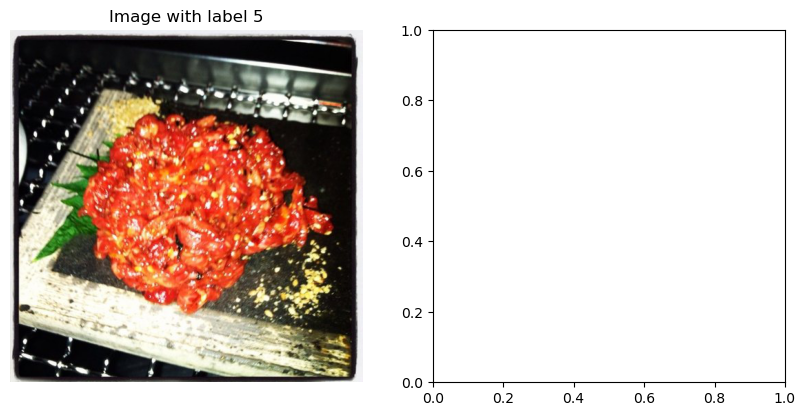

In [15]:
for img_tuple1, img_tuple2 in zip(trainset, trainset2):
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    # Iterate over each image tuple and corresponding axis
    for img_tuple, ax in zip([img_tuple1, img_tuple2], axes):
        # Extract the image object and label from the tuple
        img_object, label = img_tuple

        # Convert the image object to a numpy array
        img_array = np.array(img_object)

        # Display the image on the current axis
        ax.imshow(img_array)
        ax.set_title(f'Image with label {label}')
        ax.axis('off')  # Turn off axis labels
        
    # Adjust spacing between subplots
    plt.tight_layout()

    # Show the plot
    plt.show()
    break

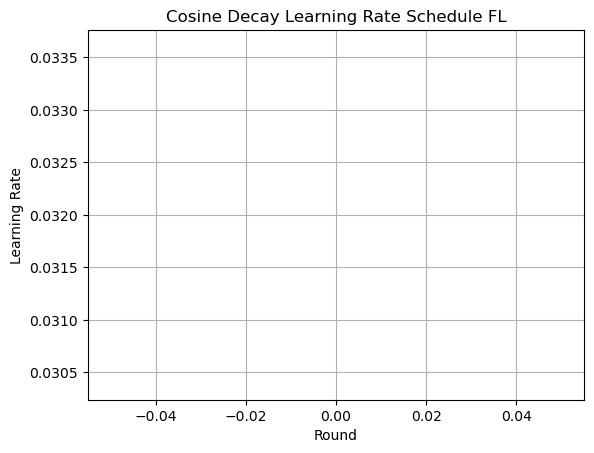

In [7]:
import matplotlib.pyplot as plt
import math
def cosine_decay_lr(init_lr, epoch, epochs):
    """Cosine decay learning rate scheduler."""
    return init_lr * 0.5 * (1. + math.cos(math.pi * epoch / epochs))

def plot_cosine_decay(init_lr, epochs):
    """Plot cosine decay learning rate schedule."""
    lr_values = [cosine_decay_lr(init_lr, epoch, epochs) for epoch in range(epochs)]
    plt.plot(range(epochs), lr_values)
    plt.xlabel('Round')
    plt.ylabel('Learning Rate')
    plt.title('Cosine Decay Learning Rate Schedule FL')
    plt.grid(True)
    # plt.savefig('images/cosine_decay_lr_schedule_fed.png', bbox_inches='tight')
    plt.show()

init_lr = 0.032
num_rounds = 1
plot_cosine_decay(init_lr=init_lr, epochs=num_rounds)